In [ ]:
## Variables with long sets of waves - how much do they change?
## If they change only negligibly - or predictably - then we can amalgamate them with little loss of inf

In [1]:
dataset_name = "W19_comb"
df_list = 'BES_Panel|BES_reduced'
#           ]#,"BESnumeric"]

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

Toggle code

In [ ]:
## start simple, sets of variables which are <blah>W\d\d

In [3]:
%%time
sequence_of_cols = match(BES_Panel,"^.*W\d{1,2}$").index
ser = pd.Series()

for x in list(set([re.match("(.*)W\d{1,2}$",x).groups()[0] for x in list(sequence_of_cols)])):
    ser.loc[x] = len( match(BES_Panel,x+"W\d{1,2}$").index )

Wall time: 41.8 s


In [54]:
# match(BES_Panel,"gor").sort_index()

In [ ]:
## some measure of change by wave?
## count over all the waves (with a thin cross-section)
## or between adjacent waves -> prob this

# type of variable matters and how many categories

# matters if they change category type!

In [3]:
# mask = BES_Panel["gorW1"].notnull() & BES_Panel["gorW2"].notnull()
# (BES_Panel["gorW1"][mask]==BES_Panel["gorW2"][mask]).mean()

In [4]:
## first off, lets turn it into a df
## then a col for the dtypes
## then a col if they keep same category set

In [5]:
df = ser.reset_index()
df.columns = ["stub","num_waves"]

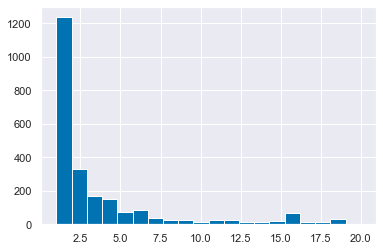

In [6]:
df["num_waves"].hist(bins=20)

In [7]:
df["dtypes"] = df["stub"].apply(lambda x: set([x.name for x in BES_Panel[match(BES_Panel,x+"W\d{1,2}$").index].dtypes.values]))
                      
df["dtypes"] = df["dtypes"].apply(lambda x:"|".join(list(x)))

In [8]:
df["dtypes"].value_counts()

category          2317
float64             37
datetime64[ns]       6
float32              3
object               1
Name: dtypes, dtype: int64

In [9]:
# cat_mask = df["dtypes"]=="category"

# df[cat_mask]

In [10]:
# df[cat_mask].loc[2359]

In [11]:
df["num_diff_dtypes"] = df["stub"].apply(lambda x: len(set(BES_Panel[match(BES_Panel,x+"W\d{1,2}$").index].dtypes.values)))

In [12]:
df["num_diff_dtypes"].value_counts()

1     2268
2       70
3       14
5        5
4        3
16       1
7        1
11       1
15       1
Name: num_diff_dtypes, dtype: int64

In [13]:
mask = (df["dtypes"]=="category") & (df["num_diff_dtypes"]==1) & (df["num_waves"]>1)

In [14]:
mask.sum()

1016

In [15]:
df[mask]

,stub,num_waves,dtypes,num_diff_dtypes
2,govtHandleImmig,6,category,1
4,askVoteLivingWith,2,category,1
5,lrSNP,15,category,1
7,likeLucas,5,category,1
8,likeMogg,2,category,1
...,...,...,...,...
2355,EUIntegrationCorbyn,4,category,1
2358,snpTone,4,category,1
2360,sharedContentOnline_1,4,category,1
2361,likeJohnson,9,category,1


In [16]:
## get list of waves

## get measure of change between each wave

In [17]:
df["waves"] = df["stub"].apply(lambda x: sorted([int(re.match(x+"W(\d{1,2})$",y).groups()[0]) for y in match(BES_Panel,x+"W\d{1,2}$",case_sensitive=True).index]))

In [18]:
# df

In [19]:
# df[df["stub"]=="gor"]

In [22]:
df[mask].head(10)

,stub,num_waves,dtypes,num_diff_dtypes,waves
2,govtHandleImmig,6,category,1,"[1, 2, 3, 4, 7, 14]"
4,askVoteLivingWith,2,category,1,"[2, 12]"
5,lrSNP,15,category,1,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 16, 1..."
7,likeLucas,5,category,1,"[10, 11, 12, 13, 14]"
8,likeMogg,2,category,1,"[14, 15]"
10,euRefInterest,2,category,1,"[7, 8]"
14,certaintyRedistLD,5,category,1,"[1, 2, 4, 6, 7]"
16,coalitionInTune,6,category,1,"[1, 2, 3, 4, 6, 11]"
17,redistSNP,16,category,1,"[1, 2, 3, 4, 6, 7, 10, 11, 12, 13, 14, 15, 16,..."
18,labHandleLevelCrime,6,category,1,"[1, 2, 3, 4, 7, 14]"


In [121]:
# mask = BES_Panel["gorW1"].notnull() & BES_Panel["gorW2"].notnull()
# (BES_Panel["gorW1"][mask]==BES_Panel["gorW2"][mask]).mean()

In [21]:
def get_wave_diff(stub,wave_list):
    diffs = []
    for pos in range(0,len(wave_list)-1):
        mask = BES_Panel[stub+"W"+str(wave_list[pos])].notnull() & BES_Panel[stub+"W"+str(wave_list[pos+1])].notnull()
        diffs.append((BES_Panel[stub+"W"+str(wave_list[pos])][mask]==BES_Panel[stub+"W"+str(wave_list[pos+1])][mask]).mean())
    return diffs
    

In [23]:
get_wave_diff("p_education",[1,2,3,4,5,6,7,8,9])

[0.984941438929169,
 0.8996460545492401,
 0.9380739742185525,
 0.8866451361039145,
 0.9973583693285261,
 0.7673591348890154,
 0.9421203438395416,
 0.9734693136863499]

In [24]:
df["diffs"] = np.nan

In [25]:
# df.loc[mask][0:5].apply(lambda x: get_wave_diff(x["stub"],x["waves"]),axis=1)

In [26]:
df.loc[mask,"diffs"] = df.loc[mask].apply(lambda x: get_wave_diff(x["stub"],x["waves"]),axis=1)

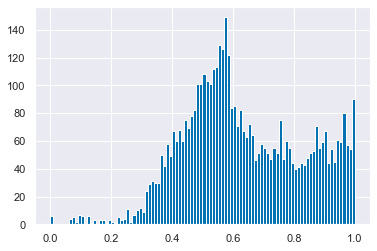

In [27]:
pd.Series(flatten(df["diffs"][mask].values)).hist(bins=100)

In [ ]:
## category number
## mean diff

In [28]:
df["diffs_mean"] = df["diffs"].apply(lambda x: np.mean(x))

In [29]:
df.loc[mask,"num_categories"] = df["stub"][mask].apply(lambda x: max([len(x.categories) for x in BES_Panel[match(BES_Panel,x+"W\d{1,2}$").index].dtypes.values]))

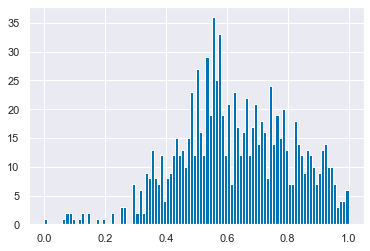

In [30]:
df["diffs_mean"].hist(bins=100)

In [55]:
df[df["diffs_mean"]>.8].sort_values(by="diffs_mean").tail(50)

,stub,num_waves,dtypes,num_diff_dtypes,waves,diffs,diffs_mean,num_categories
259,responsibleDebtDontKnow,4,category,1,"[1, 2, 3, 4]","[0.9240873739441074, 0.9290623568125963, 0.925...",0.926303,2.0
534,partyContactUKIP_6,16,category,1,"[1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 16, 1...","[0.9618320610687023, 0.8977272727272727, 0.939...",0.926344,3.0
1951,partyContactUKIP_3,16,category,1,"[1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 16, 1...","[0.8778625954198473, 0.9431818181818182, 0.868...",0.926562,3.0
2095,participation_2,2,category,1,"[18, 19]",[0.9272124146871544],0.927212,3.0
1252,partyContactLD_1,16,category,1,"[1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 16, 1...","[0.8984962406015038, 0.8780487804878049, 0.860...",0.927601,3.0
1523,pContactEday_99,2,category,1,"[13, 19]",[0.9299101913315111],0.929910,2.0
2342,genElecTurnoutRetro,4,category,1,"[6, 7, 13, 19]","[0.9561752988047809, 0.9106746740247795, 0.924...",0.930613,3.0
2052,partyContactLab_7,16,category,1,"[1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 16, 1...","[0.9390386869871044, 0.9421813403416557, 0.931...",0.931289,3.0
1670,partyContactUKIP_1,16,category,1,"[1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 16, 1...","[0.9389312977099237, 0.8863636363636364, 0.888...",0.931912,3.0
789,partyContactLD_6,16,category,1,"[1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 16, 1...","[0.9830827067669173, 0.9512195121951219, 0.967...",0.931996,3.0


In [ ]:
## look at those 100% matches
# tvWatch,paperRead,internetRead,nuclearGrid,radioListen
# -> nuclearGrid just a list who is asked quekeepNukes question and not
# same with rest of these questions


## p_parent,p_ethnicity,p_sexuality,p_housing,p_education_age,p_edlevel,p_disability,p_hh_size,p_edlevelUni,

## partyContact, partyContactNone, whichPartySigned, reasonNotRegistered_dk,participateWorkForPty,
## sharedContentOnline
## euRefpastVote,genElecTurnoutRetro,
## voteMethodEurope_4,registered,allSourceIncome_99	

In [36]:
search(BES_Panel,"tvWatch")

tvWatchW4    31551
tvWatchW5    30970
tvWatchW8     6143
dtype: int64

In [37]:
BES_Panel["tvWatchW4"].value_counts()

1.0    31551
Name: tvWatchW4, dtype: int64

In [127]:
var_name = 'p_edlevelUni'

pd.Series(df[df["stub"]==var_name]["diffs"].values[0],
          index=list(zip(df[df["stub"]==var_name]["waves"].values[0][0:-1],df[df["stub"]==var_name]["waves"].values[0][1:])))

(7, 8)      0.965884
(8, 9)      0.986085
(9, 10)     0.923612
(10, 11)    0.935649
(11, 12)    0.977861
(12, 13)    0.991083
(13, 14)    0.857268
(14, 15)    0.836958
(15, 16)    0.942172
(16, 17)    0.880968
(17, 18)    0.984609
(18, 19)    0.982911
dtype: float64

In [128]:
df[df["stub"]==var_name]

,stub,num_waves,dtypes,num_diff_dtypes,waves,diffs,diffs_mean,num_categories
1970,p_edlevelUni,13,category,1,"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]","[0.9658838966562598, 0.9860851588279728, 0.923...",0.938755,6.0


In [130]:
# pd.Series(df[df["stub"]=="p_edlevel"]["diffs"].values[0]).describe()
BES_Panel["p_edlevelUniW7"].cat.categories

Index(['No qualifications', 'Below GCSE', 'GCSE', 'A-level', 'Undergraduate',
       'Postgrad'],
      dtype='object')

In [131]:
var1 = var_name+"W"+"14"
var2 = var_name+"W"+"15"
overlap = BES_Panel[var1].notnull()&BES_Panel[var2].notnull()
mask  = overlap&(BES_Panel[var1]!=BES_Panel[var2])


BES_Panel[[var1,var2]][mask],BES_Panel[[var1,var2]][mask].apply(lambda x: x.cat.codes).diff(axis=1)[var2].value_counts()/overlap.sum()

(      p_edlevelUniW14    p_edlevelUniW15
 id                                      
 7                GCSE            A-level
 30            A-level               GCSE
 84               GCSE         Below GCSE
 96      Undergraduate            A-level
 109           A-level               GCSE
 ...               ...                ...
 75081            GCSE         Below GCSE
 75083   Undergraduate            A-level
 75113         A-level  No qualifications
 75136            GCSE  No qualifications
 75150   Undergraduate            A-level
 
 [2924 rows x 2 columns],
  1    0.071819
 -1    0.054143
  2    0.015278
 -2    0.013773
 -3    0.003457
  3    0.003401
 -4    0.000613
  4    0.000502
 -5    0.000056
 Name: p_edlevelUniW15, dtype: float64)

In [132]:
var1 = var_name+"W"+"7"
var2 = var_name+"W"+"8"
overlap = BES_Panel[var1].notnull()&BES_Panel[var2].notnull()
mask  = overlap&(BES_Panel[var1]!=BES_Panel[var2])


BES_Panel[[var1,var2]][mask],BES_Panel[[var1,var2]][mask].apply(lambda x: x.cat.codes).diff(axis=1)[var2].value_counts()/overlap.sum()

(          p_edlevelUniW7 p_edlevelUniW8
 id                                     
 1                A-level  Undergraduate
 46               A-level  Undergraduate
 78                  GCSE        A-level
 203              A-level  Undergraduate
 354              A-level  Undergraduate
 ...                  ...            ...
 50611            A-level  Undergraduate
 50649      Undergraduate        A-level
 50703  No qualifications  Undergraduate
 50875         Below GCSE           GCSE
 50958            A-level           GCSE
 
 [754 rows x 2 columns],
  1    0.014977
 -1    0.012036
  2    0.003032
 -2    0.002670
 -3    0.000543
  3    0.000407
  4    0.000226
 -4    0.000181
 -5    0.000045
 Name: p_edlevelUniW8, dtype: float64)

In [79]:
# p_edlevel (worst case ~2% err)
## changes tend to be short-distance (e.g. respect ordinal/rank structure)
## changes tend to be positive skewed

## logical implication -> noise has a bell-curve
##                     -> backwards transitions not possible

# ( like age!)
# p_parent, same (worst case ~4% err)

# p_ethnicity diff, 3% err case is mostly -1 (other cases mostly +1)
# looks like switch between broader categories/more specific
# but also 'prefer not to say'

# p_sexuality 5% err, similar pattern - most common +/- 4, heterosexual <-> pref not to say

# p_housing 10% err, mostly +/- 1

# p_education_age 15% err, mostly +/- 1

# p_edlevel 15% err, mostly +/- 1

# p_disability 16% err, -1>+1

# p_hh_size 14%, +/- 1

# p_edlevelUni 16% +/- 1